In [1]:
import librosa
import numpy as np
from matplotlib import pyplot as plt
from pydub import AudioSegment
from scipy import signal
from sklearn import preprocessing
import os
from keras.layers import LSTM, Dense, Conv1D, MaxPool1D, Dropout
from keras.models import Sequential

2022-06-19 17:32:35.963901: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-19 17:32:35.963926: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
path = os.getcwd()
pathAudio = path + '/train-stochastic/'
files = librosa.util.find_files(pathAudio, ext=['mp3'])
files = sorted(files, key=lambda x: int(x.split('_')[-1].split(".")[0]))

In [3]:
def normalize_sample(sample):
    array_of_samples = sample.get_array_of_samples()
    np_arr = np.array(array_of_samples)
    np_arr = np_arr.reshape(1, -1)
    return preprocessing.normalize(np_arr)


samples = []
samples_sec_canal = []
for file_name in files:
    sample = AudioSegment.from_mp3(file_name)
    mono_samples = sample.split_to_mono()
    normalized_sample = normalize_sample(mono_samples[0])[0]
    resampled_sample = signal.resample(normalized_sample, int(len(normalized_sample) / 35))
    samples.append(resampled_sample)
    normalized_sample_sec_canal = normalize_sample(mono_samples[1])[0]
    resampled_sample_sec_canal = signal.resample(normalized_sample_sec_canal, int(len(normalized_sample) / 35))
    samples_sec_canal.append(resampled_sample_sec_canal)

In [4]:
#for sample in samples:
#    plt.plot(sample)
#    plt.show()

In [5]:
samples = []
samples_sec_canal = []
for file_name in files:
    sample = AudioSegment.from_mp3(file_name)
    mono_samples = sample.split_to_mono()
    normalized_sample = normalize_sample(mono_samples[0])[0]
    resampled_sample = signal.resample(normalized_sample, 1000)
    samples.append(resampled_sample)
    normalized_sample_sec_canal = normalize_sample(mono_samples[1])[0]
    resampled_sample_sec_canal = signal.resample(normalized_sample_sec_canal, 1000)
    samples_sec_canal.append(resampled_sample_sec_canal)

In [6]:
#for sample in samples:
#    plt.plot(sample)
#    plt.show()

In [7]:
#samples = np.array(samples)
#full_song = []
#for sample in samples:
#    full_song.extend(sample)

In [8]:
#full_song = np.array(full_song)
#full_song.shape

In [9]:
#batch_size = 2000
#steps = 100
#sum_batch_size = batch_size + steps
#X = []
#Y = []
#for i in range(0, len(full_song) - batch_size, steps):
#    if i < len(full_song) - sum_batch_size:
#        X.append(full_song[i:i + batch_size])
#        Y.append(True)

In [10]:
#X = np.array(X)
#X.shape

In [11]:
#Y = np.array(Y).reshape(-1, 1)

In [12]:
# Prepare further False data
#reversed_data = np.array(full_song)
#reversed_data = [num for num in reversed(reversed_data)]
#X_false = []
#Y_false = []
#for i in range(0, len(reversed_data) - batch_size, steps):
#    if i < len(reversed_data) - sum_batch_size:
#        X_false.append(np.array(reversed_data[i:i + batch_size]))
#        Y_false.append(False)

In [13]:
#X_false = np.array(X_false)
#X_false.shape

In [14]:
#Y_false = np.array(Y_false).reshape(-1, 1)
#Y_false.shape

In [15]:
#X_train = X_train.reshape(-1, 2000)
#X_train.shape

In [16]:
#Y_train = Y_train.reshape(-1, 1)
#Y_train.shape

In [137]:
X_train = []
Y_train = []
for i in range(len(samples)):
    Y_train.append(i)
    if i < len(samples)-1:
        x = list(samples[i])
        y = list(samples[i+1])
        z = x + y
        X_train.append(z)
    else:
        x = list(samples[i])
        y = list(samples[0])
        z = x + y
        X_train.append(z)

In [181]:
from numpy import random
import difflib

X_train_false = []

def get_strange_end_part(samples, current_index, max_len):
    x = random.randint(max_len)
    if x != current_index:
        return samples[x]
    else:
        return get_strange_end_part(samples, current_index, max_len)


for i in range(len(samples)):
    first_half = samples[i]
    last_half = get_strange_end_part(samples, i, len(samples))
    new_sample = list(first_half) + list(last_half)
    X_train_false.append(new_sample)
    #Y_train.append(False)

In [138]:
X_train = np.array(X_train)
X_train = X_train.reshape(-1, 2000)

In [139]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [140]:
Y_train = np.array(Y_train)
Y_train.shape

(59, 59)

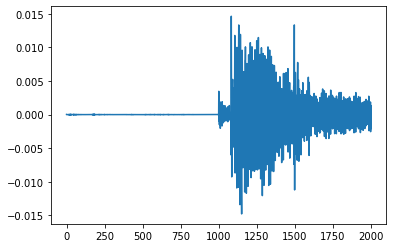

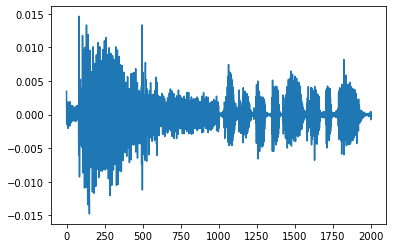

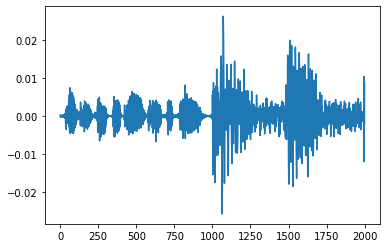

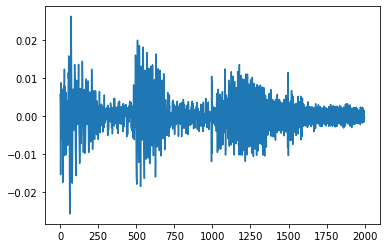

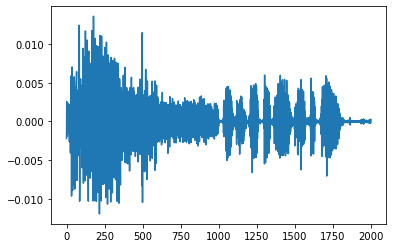

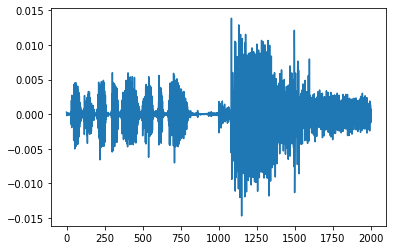

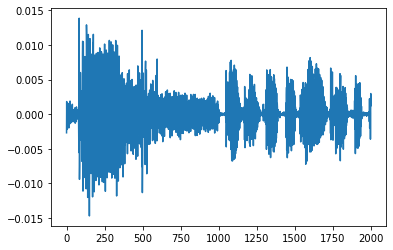

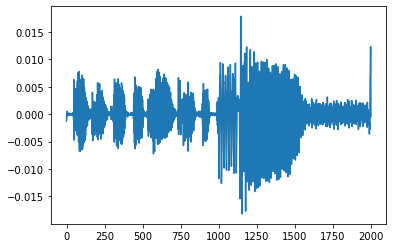

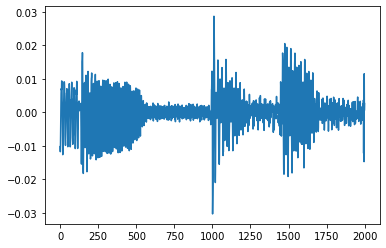

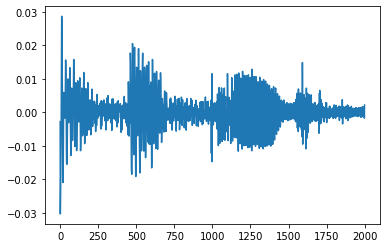

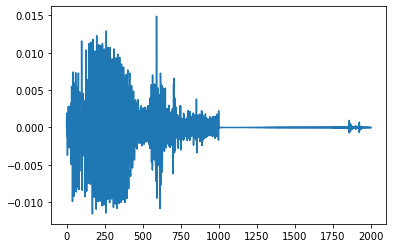

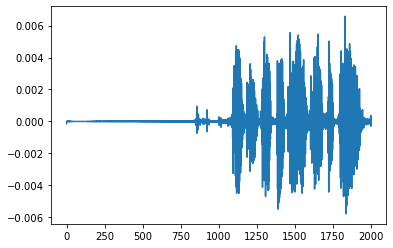

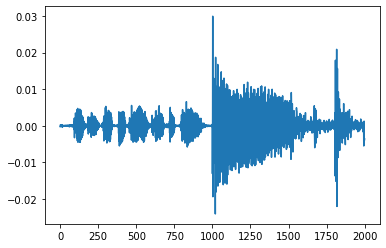

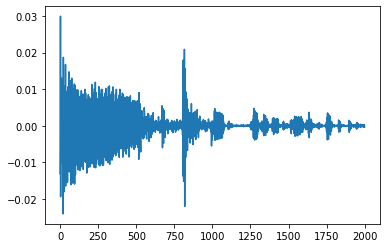

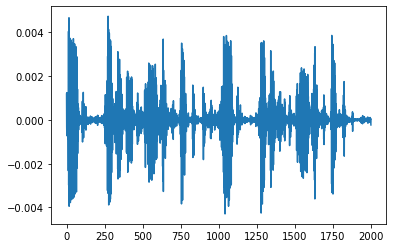

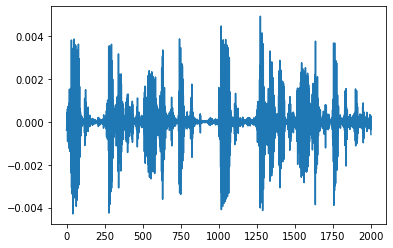

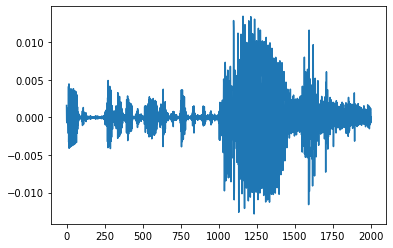

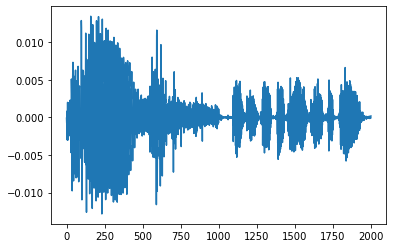

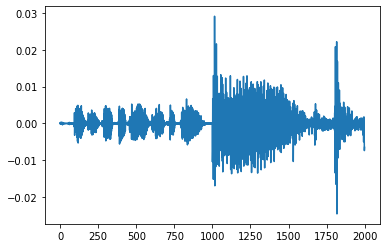

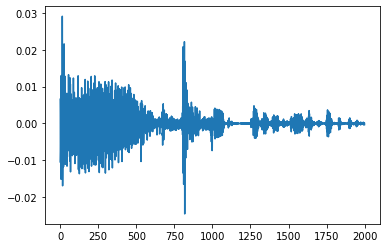

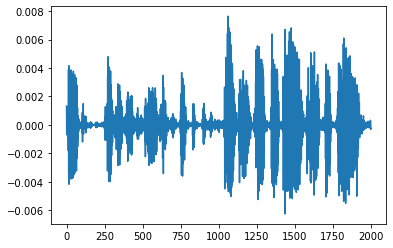

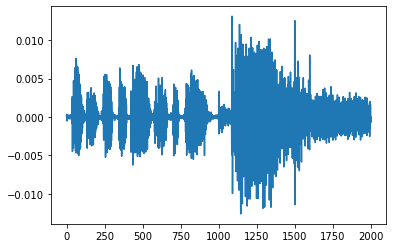

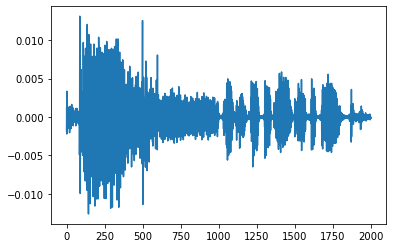

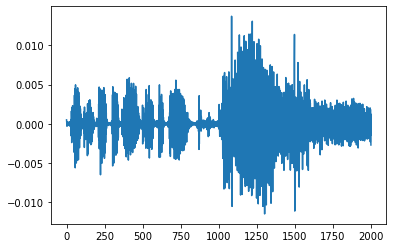

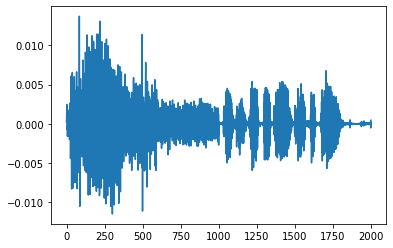

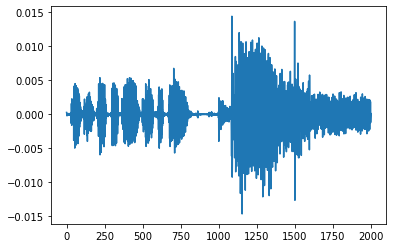

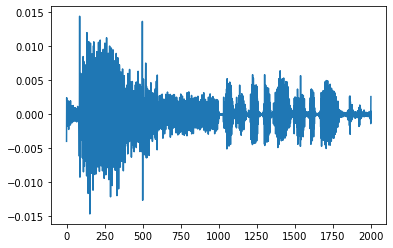

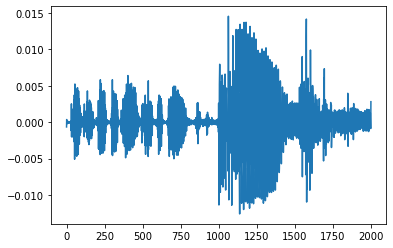

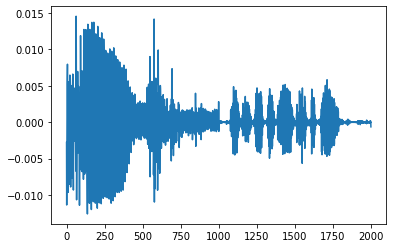

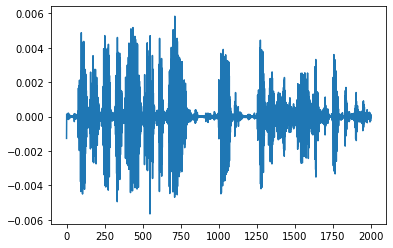

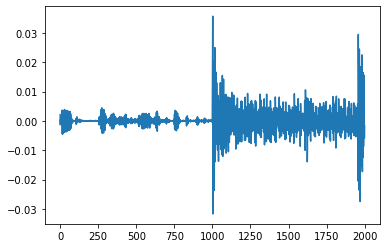

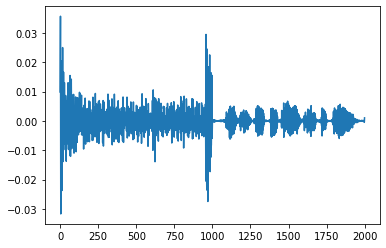

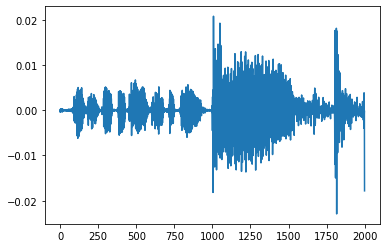

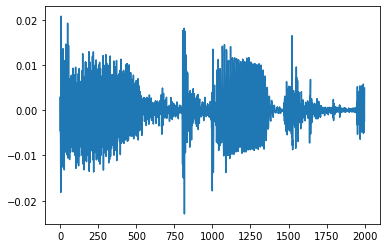

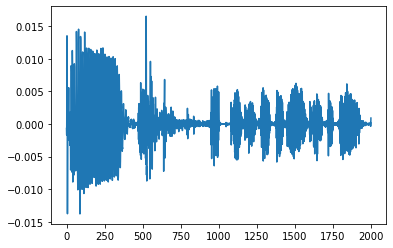

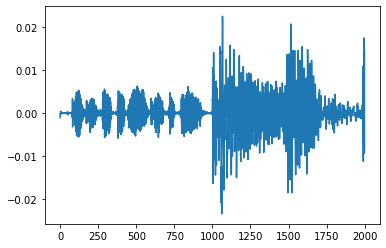

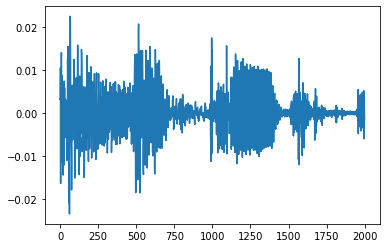

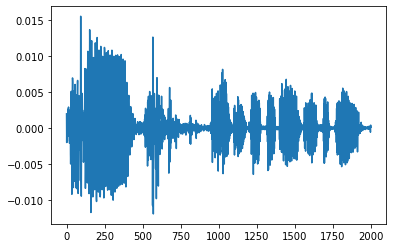

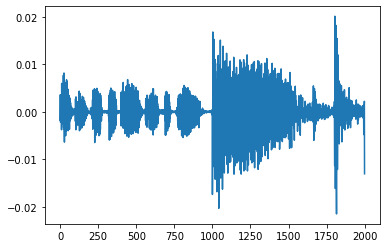

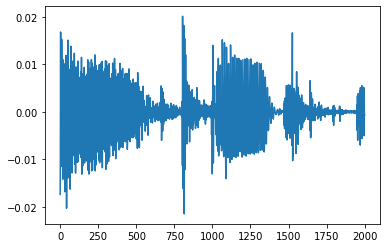

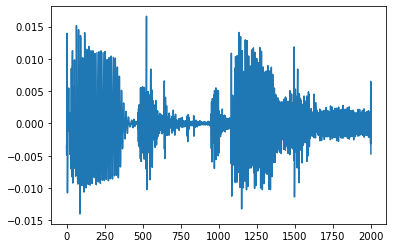

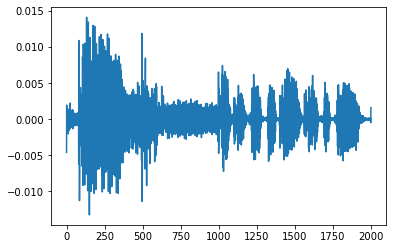

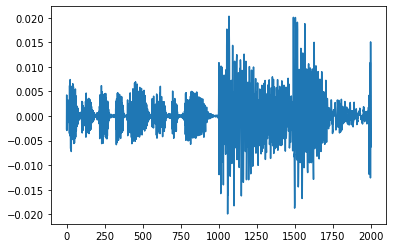

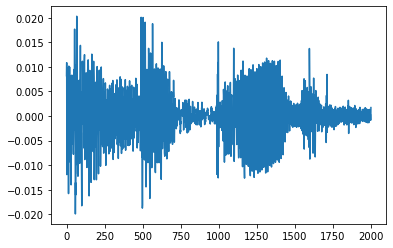

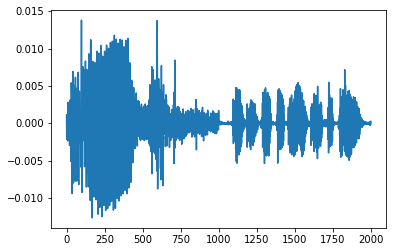

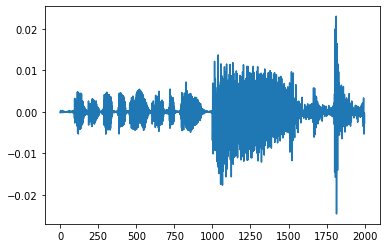

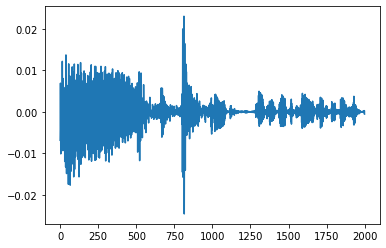

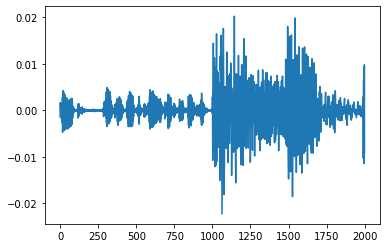

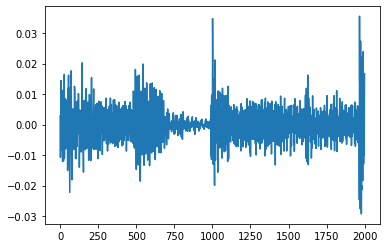

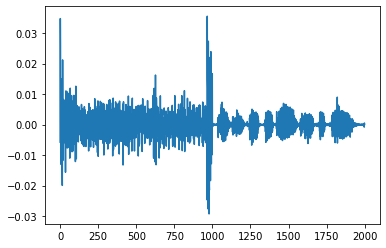

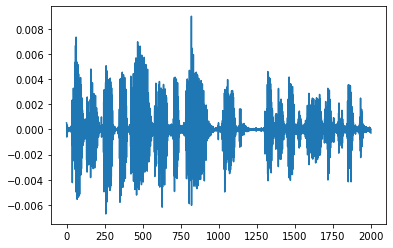

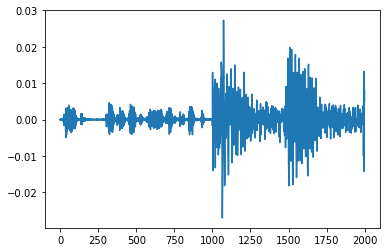

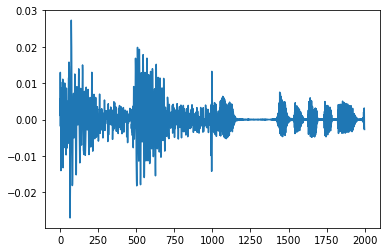

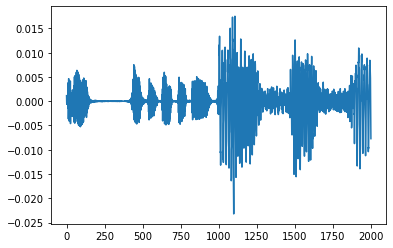

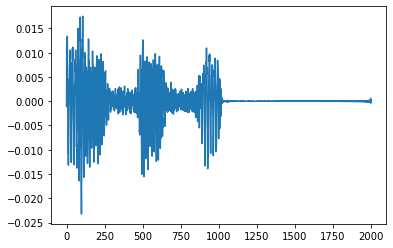

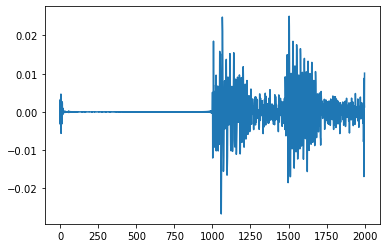

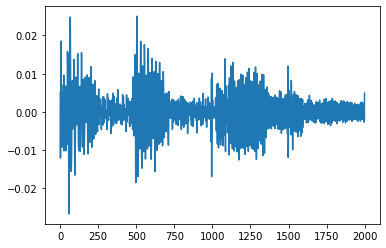

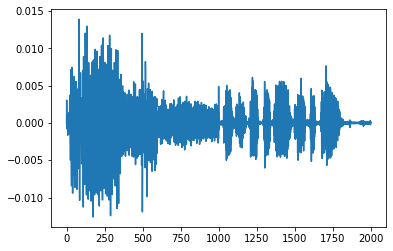

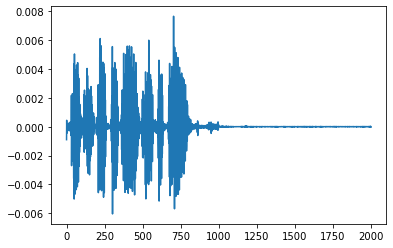

In [190]:
for sample in X_train:
    plt.plot(sample)
    plt.show()

In [148]:
from keras.layers import Softmax

model = Sequential()
#model.add(Conv1D(filters=1000, kernel_size=10, input_shape=(2000, 1)))
#model.add(MaxPool1D(pool_size=2, strides=2))
#model.add(LSTM(100, activation='sigmoid'))
#model.add(LSTM(1000, input_shape=(2000, 1)))
#model.add(Dropout(0.2))
#model.add(Softmax())
#model.add(Dense(1))
model.add(Dense(2000, input_shape=(2000,)))
model.add(Dense(59, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 2000)              4002000   
                                                                 
 dense_24 (Dense)            (None, 59)                118059    
                                                                 
Total params: 4,120,059
Trainable params: 4,120,059
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, Y_train, epochs=100)

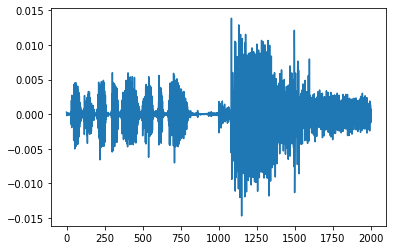

1/1 [==============================] - 0s 14ms/step


array([[0.9981041 , 0.19066072, 0.3716349 , 0.21999474, 0.1287263 ,
        0.9999991 , 0.15809503, 0.21106824, 0.09755758, 0.06024241,
        0.53808683, 0.45505723, 0.20783563, 0.22307183, 0.90969455,
        0.7531323 , 0.18766515, 0.38411328, 0.21971151, 0.34882903,
        0.33446127, 0.00309071, 0.5048482 , 0.03383601, 0.22351906,
        0.3041807 , 0.5634515 , 0.5556673 , 0.40388396, 0.20677425,
        0.11002701, 0.12890527, 0.19999231, 0.32803002, 0.05051912,
        0.1024396 , 0.27108034, 0.2760854 , 0.2161185 , 0.24023187,
        0.98004526, 0.22505072, 0.4676116 , 0.08848108, 0.33618686,
        0.59865785, 0.1770273 , 0.519159  , 0.13887432, 0.14630577,
        0.35735926, 0.25656804, 0.31737554, 0.3086702 , 0.15420598,
        0.2552211 , 0.72906846, 0.32385054, 0.99850637]], dtype=float32)

In [194]:
example_x_train = X_train[5]
plt.plot(example_x_train)
plt.show()
example_x_train = example_x_train.reshape(1, 2000)
model.predict(example_x_train)

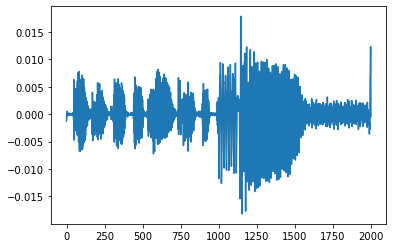

1/1 [==============================] - 0s 15ms/step


array([[0.28379694, 0.28855965, 0.8888376 , 0.3810779 , 0.36894912,
        0.3479369 , 0.36617318, 0.999997  , 0.14204624, 0.18963706,
        0.386771  , 0.7289564 , 0.29369336, 0.1937793 , 0.91329885,
        0.9060395 , 0.46238267, 0.30072758, 0.38620445, 0.298682  ,
        0.54455984, 0.54950553, 0.32592744, 0.41828132, 0.26211423,
        0.6402607 , 0.3438909 , 0.63150036, 0.40675855, 0.77493846,
        0.12707637, 0.25049064, 0.29635778, 0.20624356, 0.25520885,
        0.02125628, 0.02978423, 0.5693943 , 0.3321344 , 0.16937517,
        0.160233  , 0.3637174 , 0.07042011, 0.2096628 , 0.34985593,
        0.48702237, 0.2939085 , 0.7177554 , 0.11637748, 0.25450504,
        0.57560843, 0.7891242 , 0.40325674, 0.5296942 , 0.2764347 ,
        0.01685596, 0.2542785 , 0.43627635, 0.82799685]], dtype=float32)

In [195]:
example_x_train = X_train[7]
plt.plot(example_x_train)
plt.show()
example_x_train = example_x_train.reshape(1, 2000)
model.predict(example_x_train)

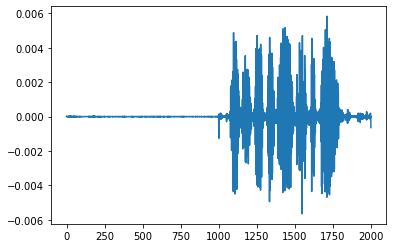

1/1 [==============================] - 0s 15ms/step


array([[0.5061221 , 0.40475038, 0.24123114, 0.17021872, 0.30941394,
        0.39403498, 0.33905745, 0.28497744, 0.17115586, 0.19504541,
        0.53747845, 0.8340841 , 0.31860438, 0.31060562, 0.94455165,
        0.9315805 , 0.45560727, 0.30758032, 0.33460924, 0.34304848,
        0.74789226, 0.37786594, 0.40300983, 0.36044505, 0.35019   ,
        0.34862208, 0.42604062, 0.4413263 , 0.8234374 , 0.83325255,
        0.2746066 , 0.25718653, 0.3427835 , 0.2320494 , 0.2589722 ,
        0.3005995 , 0.24786443, 0.40724555, 0.30725583, 0.22146596,
        0.1346217 , 0.4128888 , 0.2716596 , 0.18746932, 0.4004081 ,
        0.33523676, 0.35650206, 0.25802216, 0.1618283 , 0.23176216,
        0.76243067, 0.38594812, 0.32935452, 0.24046388, 0.23088388,
        0.28682134, 0.2001192 , 0.3076678 , 0.8874571 ]], dtype=float32)

In [184]:
example_x_train = X_train_false[0]
plt.plot(example_x_train)
plt.show()
example_x_train = np.array(example_x_train)
example_x_train = example_x_train.reshape(1, 2000)
model.predict(example_x_train)

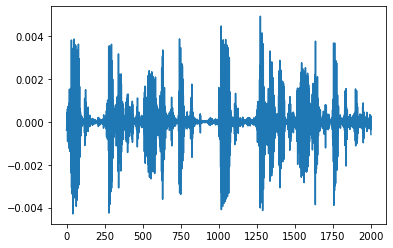

In [193]:
plt.plot(X_train[15])
plt.show()